# PROJECT 1: Investigate A Dataset - Medical Appointment No Shows


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>




<a id='intro'></a>
### INTRODUCTION
In this project, I aim to investigate a dataset that collects information from over 100k medical appointments in Brazil and is mainly focused on the question of whether or not patients show up for their appointment. 

More information about this data and the download link can be found [here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf)

I have downloaded this dataset into the project folder so I'll start by exploring the data to make sure I clean it up and get it ready for analysis.


#### Below are a few questions I would love to answer with my analysis
<ol>
<li> Are there specific days of the week where patient show up is significantly higher?</li>
<li> How does the neighbourhood or patient age/gender affect patient adherence to scheduled appointments?</li>
<li> What factors are important to predict if a patient will show up for their scheduled appointment?</li>
<li> Is the patient show up probability affected by the time of the day the apointment is booked for?</li>
<li> Does the number of reminders sent to patient affect if they'll show up for their appointments or not?</li>
</ol>


In [1]:
# Importing all the packages I'll need for my analysis
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
### DATA WRANGLING

In [2]:
#Loading the dataset
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now that the data has been imported and we have a glance of what the dataset looks like, we can begin to ask questions that will drive our analysis.


**Before anything, I'll do a quick summary check of the dataset for inconsistencies in data types and missing data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


A quick glance at the first five rows and info of our dataset indicates that the data to a large extent is quite cleaned up already.

There is also no missing data. I'll just do a few things like changing data types of some columns and representing some others correctly.

I'll start by converting the `AppointmentDay` and `ScheduledDay` columns to standard date format


In [4]:
#Converting AppointmentDay and ScheduledDay columns to datetime format
df.iloc[:, 3:5] = df.iloc[:, 3:5].apply(pd.to_datetime, errors = 'raise', format = '%Y-%m-%d' )

In [5]:
#Confirming that the change was effected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [6]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


I will go ahead now to change the `AppointmentID` and `patientID` colum to string because ID columns are not summable.

But before then, I will remane the `Handcap` column which is spelt incorrectly, then the `SMS_received` and `No-show` columns so the naming convention can be uniform

In [7]:
#Renaming Columns
df.rename(columns = {'Handcap':'Handicap', 'SMS_received':'SmsReceived', 'No-show':'NoShow'}, inplace = True)

In [8]:
#Converting PatientID and AppointmentID to string
df.iloc[:, :2] = df.iloc[:, :2].astype(str)

In [9]:
#Confirming change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SmsReceived     110527 non-null  int64              
 13  NoShow        

In [10]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Because the PatientID column was converted from float, it has the trailing decimal. I am going to remove that so I can have the actual IDs. I'll also check the dataset for duplicates.

In [11]:
#Removing the trailing decimal from PatientId
df['PatientId']=  df['PatientId'].apply(lambda x: x.strip('.0'))

In [12]:
#Confirming change
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
#Checking for duplicates
df.duplicated().sum()

0

There are no duplicate records.

From the data dictionary, we also see that the `Scholarship`,`Hipertension`,`Diabetes`,`Alcoholism`, and `Handicap` are all supposed to be boolean data types.

I will convert them to boolean data types

In [14]:
#Changing all the above listed datatypes to boolean except NoShow
df.iloc[:, [7,8,9,10,11]] = df.iloc[:, [7,8,9,10,11]].astype(bool)

`NoShow` column is a string data type but is quite confusing wiyh the `Yes` and `no` values. i want to convert it to a more understandable value.

I will use a function `ChangeNoShow` that will convert the NoShow column values from `Yes` to `NoShow` and from `No` to `Show`

In [15]:
#Function to convert string entry 
def ChangeNoShow(x):
    if x == 'Yes':
        return 'NoShow'
    else:
        return 'Show'

In [16]:
df['NoShow'] = df['NoShow'].apply(ChangeNoShow)

In [17]:
#Confirmimg change
print(df.info())
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  bool               
 8   Hipertension    110527 non-null  bool               
 9   Diabetes        110527 non-null  bool               
 10  Alcoholism      110527 non-null  bool               
 11  Handicap        110527 non-null  bool               
 12  SmsReceived     110527 non-null  int64              
 13  NoShow        

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,0,Show


**Now that our data is clean enough, let's start answering the questions**

<a id='eda'></a>
### EXPLORATORY DATA ANALYSIS

### Q1. Are there specific days of the week where patient show up is significantly higher?

To get this, we have to add a column that derives the Day of the week from AppointmentDay.

In [18]:
# Adding Weekday column

df['Weekday'] = df['AppointmentDay'].dt.day_name()

In [19]:
#Confirming new column
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,Weekday
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,0,Show,Friday


Now we can chart the number of know shows against weekdays to know the days with most no shows

First, let's find out a few details about the NoShow statistics

In [20]:
df['NoShow'].describe()

count     110527
unique         2
top         Show
freq       88208
Name: NoShow, dtype: object

In [21]:
#Splitting the data into patients that showed up and patients that didn't
df_noshow = df.query('NoShow == "NoShow"')
df_show = df.query('NoShow == "Show"')

In [22]:
df_noshow.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,Weekday
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,False,0,NoShow,Friday
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,False,False,False,False,False,0,NoShow,Friday
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,False,False,False,False,False,1,NoShow,Friday


In [23]:
df_show.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,Weekday
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,0,Show,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,0,Show,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,0,Show,Friday


In [24]:
df_noshow.shape

(22319, 15)

In [25]:
df_show.shape

(88208, 15)

In [26]:
#Plotting NoShow data against Weekdays
#Get count for Show and NoShow for each weekday
ShowCount = df.groupby(['NoShow', 'Weekday']).count()['AppointmentDay']
ShowCount

NoShow  Weekday  
NoShow  Friday        4037
        Monday        4690
        Saturday         9
        Thursday      3338
        Tuesday       5152
        Wednesday     5093
Show    Friday       14982
        Monday       18025
        Saturday        30
        Thursday     13909
        Tuesday      20488
        Wednesday    20774
Name: AppointmentDay, dtype: int64

In [27]:
Show = ShowCount['Show']
NoShow = ShowCount['NoShow']
Show

Weekday
Friday       14982
Monday       18025
Saturday        30
Thursday     13909
Tuesday      20488
Wednesday    20774
Name: AppointmentDay, dtype: int64

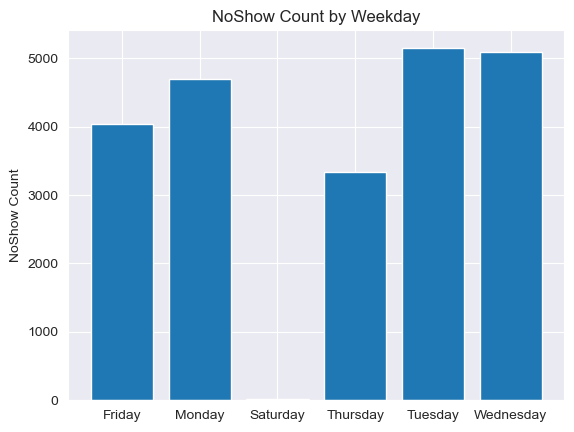

In [28]:
labels = [i for i in NoShow.index]  # xtick labels
plt.bar(labels, NoShow)

# title and labels
plt.ylabel('NoShow Count')
plt.title('NoShow Count by Weekday');

In [29]:
#Function to add labels to barchart
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

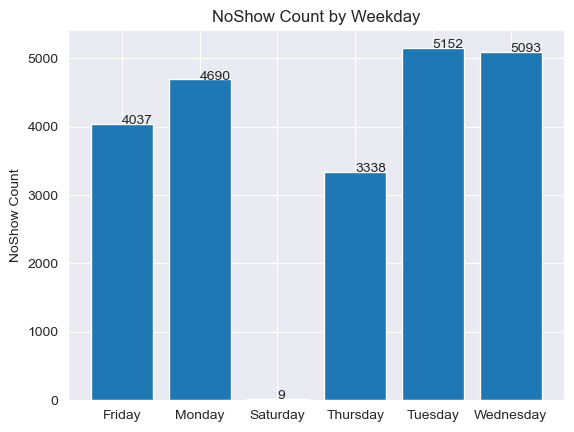

In [30]:
labels = [i for i in NoShow.index]  # xtick labels
plt.bar(labels, NoShow)
addlabels(labels, NoShow)

# title and labels
plt.ylabel('NoShow Count')
plt.title('NoShow Count by Weekday');

We can see the only significant difference is that there are only 9 NoShows on Saturday. We are going to plot the NoShow appointments as a proportion of the Show appointments to better determine the days with higher or lower NoShow appointments as regards to toatal appointments booked

In [31]:
NoShow_Proportions = NoShow/df.groupby(['Weekday']).count()['AppointmentDay']
NoShow_Proportions

Weekday
Friday       0.212261
Monday       0.206471
Saturday     0.230769
Thursday     0.193541
Tuesday      0.200936
Wednesday    0.196892
Name: AppointmentDay, dtype: float64

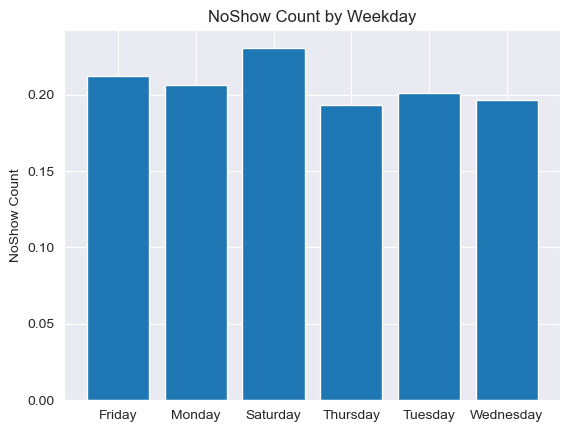

In [32]:
labels = [i for i in NoShow.index]  # xtick labels
plt.bar(labels, NoShow_Proportions)

# title and labels
plt.ylabel('NoShow Count')
plt.title('NoShow Count by Weekday');

This show that there are approximately equal proportion of NoShow appointments on every weekday.

**We can therefore conclude that the day of the week in which an appointmnet is booked does not affect if the patients will show or not.**

### 2. How does the neighbourhood or patient age/gender affect patient adherence to scheduled appointments?

To answer this question, we'll have to inspect the `Neighbourhood`, `Age`, and `Gender` columns

First, let's look at the `Neighborhood` column

In [33]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [34]:
#Get count for NoShow Appointments for each neighborhood
NoShowNbHood = df_noshow.groupby(['Neighbourhood']).count()['AppointmentDay']
NoShowNbHood.sort_values(ascending=False)

Neighbourhood
JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: AppointmentDay, Length: 80, dtype: int64

In [35]:
#Get count for Proportions of NoShow Appointments for each neighborhood
NoShowNbHoodProp = NoShowNbHood/df.groupby(['Neighbourhood']).count()['AppointmentDay']
NoShowNbHoodProp.sort_values(ascending=False)

Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
                                 ...   
SOLON BORGES                   0.147122
MÁRIO CYPRESTE                 0.145553
AEROPORTO                      0.125000
ILHA DO BOI                    0.085714
PARQUE INDUSTRIAL                   NaN
Name: AppointmentDay, Length: 81, dtype: float64

From this summary, we can see that the top 5 Neighbourhoods with highest NoShow rates are:

- JARDIM CAMBURI                 **1465**
- MARIA ORTIZ                    **1219**
- ITARARÉ                         **923**
- RESISTÊNCIA                     **906**
- CENTRO                          **703**

And the 5 Neighbourhoods with lowest NoShow rates are:

- PONTAL DE CAMBURI                **12**
- ILHA DO BOI                       **3**
- ILHAS OCEÂNICAS DE TRINDADE       **2**
- ILHA DO FRADE                     **2**
- AEROPORTO                         **1**

However, when we compare the proportion of Noshow to the total appointment booked we can see that **ITARARÉ** is the only city with higher NoShow numbers and relatively high NoShow proportion. Also, we can see that **ILHAS OCEÂNICAS DE TRINDADE** had only 2 booked appointments and both were NoShows.
There's not much we can derive from this data as we will need additional information to do this


No let's focus on the `Age` and `Gender` columns

Let us group the data set into 8 categories by agegroup and gender. To do this and get appropriate age group classifications, I'll inspect as statistical summary of the age column.

In [36]:
df_noshow['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

Based on this, we will use the following categories

- Male (0 - 12)
- Female (0 - 12)
- Male (13 - 29)
- Female (13 - 29)
- Male (30 - 55)
- Female (30 - 54)
- Male (55+)
- Female (55+)

We'll write a function to achieve this


In [37]:
# Function to create agegroup classification

def agegroup(age, gender):
    if gender == 'M':
        if age <= 12:
            return 'Male (0 - 12)'
        if 13 <= age < 30:
            return 'Male (13 - 29)'
        if 30 <= age < 55:
            return 'Male (30 - 54)'
        else:
            return 'Male (55+)'
    elif gender =='F':
        if age <= 12:
            return 'Female (0 - 12)'
        if 13 <= age < 30:
            return 'Female (13 - 29)'
        if 30 <= age < 55:
            return 'Female (30 - 54)'
        else:
            return 'Female (55+)'

In [38]:
# Applying Agegroup function to create new column

df['AgeGroup'] = [agegroup(*v) for v in df.iloc[:,[5,2]].values]
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,Weekday,AgeGroup
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,0,Show,Friday,Female (55+)


In [39]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,Weekday,AgeGroup
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,0,Show,Friday,Female (55+)
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,0,Show,Friday,Male (55+)
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,0,Show,Friday,Female (55+)
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,0,Show,Friday,Female (0 - 12)
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,0,Show,Friday,Female (55+)
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,False,True,False,False,False,0,Show,Friday,Female (55+)
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,False,0,NoShow,Friday,Female (13 - 29)
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,False,False,False,False,False,0,NoShow,Friday,Female (30 - 54)
8,56394729949972,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,False,False,False,False,False,0,Show,Friday,Female (13 - 29)
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,False,False,False,False,False,0,Show,Friday,Female (13 - 29)


In [40]:
#Splitting the new data into patients that showed up and patients that didn't
df_noshow = df.query('NoShow == "NoShow"')
df_show = df.query('NoShow == "Show"')

In [41]:
df_noshow.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,Weekday,AgeGroup
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,False,0,NoShow,Friday,Female (13 - 29)


Now we'll plot a bar chart to show the group with highest NoShow records.


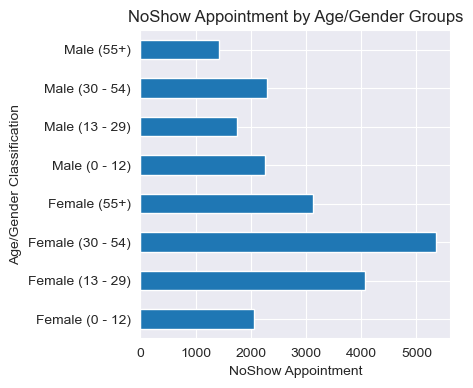

In [42]:
df_noshow.groupby('AgeGroup').count()['AppointmentID'].plot(kind = 'barh', figsize=(4,4))
plt.ylabel('Age/Gender Classification')
plt.xlabel('NoShow Appointment')
plt.title('NoShow Appointment by Age/Gender Groups');

We can see that majority of the NoShow Appointments are for female patients within the age of 13-29 and 30-54. Female patients that are 55 yrs and above have the 3rd highest NoShow.

As usual, let's see if this is the same when we use proportions

In [43]:
NoShow_AgeGroup_Prop= df_noshow.groupby(['AgeGroup']).count()['AppointmentID']/df.groupby(['AgeGroup']).count()['AppointmentID']
NoShow_AgeGroup_Prop

AgeGroup
Female (0 - 12)     0.204530
Female (13 - 29)    0.251158
Female (30 - 54)    0.204583
Female (55+)        0.160638
Male (0 - 12)       0.204921
Male (13 - 29)      0.253883
Male (30 - 54)      0.201833
Male (55+)          0.151409
Name: AppointmentID, dtype: float64

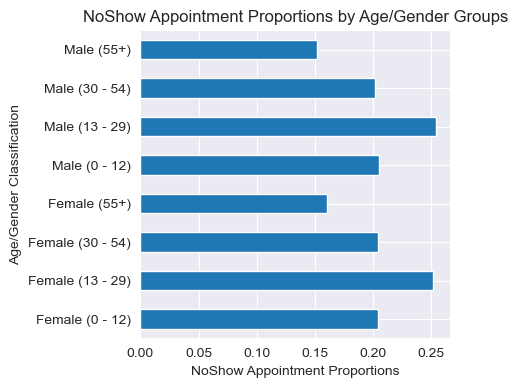

In [44]:
NoShow_AgeGroup_Prop.plot(kind = 'barh', figsize=(4,4))
plt.ylabel('Age/Gender Classification')
plt.xlabel('NoShow Appointment Proportions')
plt.title('NoShow Appointment Proportions by Age/Gender Groups');

Looking at the proportions chart however, we can see that the patients between ages **13-29, both male and female** have the **highest NoShow rate.** Also, patients aged **55 and above (both male and female)** have the **lowest NoShow rate.**

### 3. What factors are important to predict if a patient will show up for their scheduled appointment?

To determine what factors are important to to predict if a patient will show up or not, I will plot the given factors against the NoShow appointments data to see the relationship

**We'll start with how the Scholarship status of the patient affect their showing up or not**

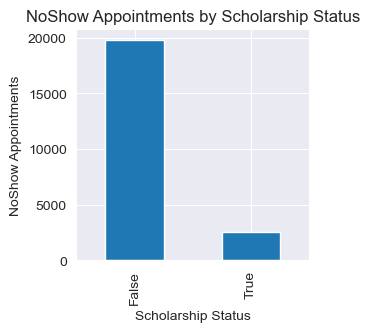

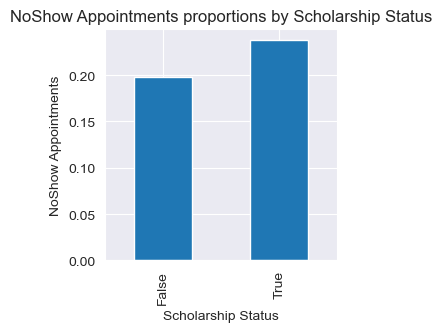

In [45]:
#Plotting the values of Scholarship status
df_noshow.groupby('Scholarship').count()['AppointmentID'].plot(kind = 'bar', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Scholarship Status')
plt.title('NoShow Appointments by Scholarship Status')
plt.show();

#Plotting the proportions of Scholarship status
NoShow_Schol_Prop= df_noshow.groupby(['Scholarship']).count()['AppointmentID']/df.groupby(['Scholarship']).count()['AppointmentID']
NoShow_Schol_Prop.plot(kind = 'bar', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Scholarship Status')
plt.title('NoShow Appointments proportions by Scholarship Status')
plt.show();

After plotting only the values, it seemed that patients without scholarship were the majority of those that did not keep to appointments but after plotting the proportions, we can see that the high values was just because we have more patients that are not on scholarship and there's **negligible difference** between the proportion of `scholarship` and `Non-Scholarship` patients that don't show up for their appointments. Infact, a higher proportion of patients on scholarships look more likely not to show up for appointments.

**Now, we will look at the `Hipertension` status of the patient**

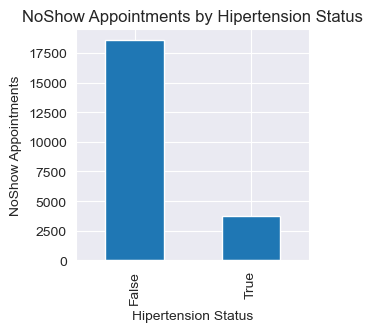

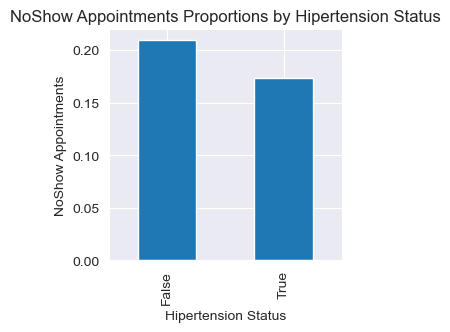

In [46]:
#Plotting the values of Hipertension status
df_noshow.groupby('Hipertension').count()['AppointmentID'].plot(kind = 'bar', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Hipertension Status')
plt.title('NoShow Appointments by Hipertension Status')
plt.show();


#Plotting the proportions of Hipertension status
NoShow_Schol_Prop= df_noshow.groupby(['Hipertension']).count()['AppointmentID']/df.groupby(['Hipertension']).count()['AppointmentID']
NoShow_Schol_Prop.plot(kind = 'bar', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Hipertension Status')
plt.title('NoShow Appointments Proportions by Hipertension Status')
plt.show();

Just like the Hipertension data, after plotting only the values, it seemed that patients without hipertension were the majority of those that did not keep to appointments but after plotting the proportions, we can see that the high values was also because we have more patients that don't have hipertension and there's **little difference** between the proportion of `Hipertension` and `Non-Hipertension` patients that don't show up for their appointments. 

**Now, we will look at the `Diabetes`, `Alcoholism` and `handicap` status of the patient**

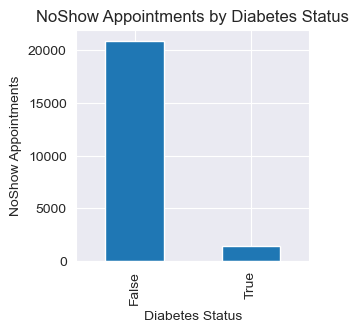

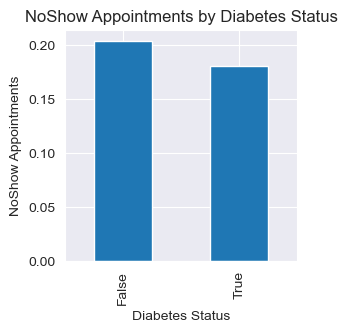

In [47]:
#Plotting the values of Diabetes status
df_noshow.groupby('Diabetes').count()['AppointmentID'].plot(kind = 'bar', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Diabetes Status')
plt.title('NoShow Appointments by Diabetes Status')
plt.show()

#Plotting the proportions of Diabetes status
NoShow_Schol_Prop= df_noshow.groupby(['Diabetes']).count()['AppointmentID']/df.groupby(['Diabetes']).count()['AppointmentID']
NoShow_Schol_Prop.plot(kind = 'bar', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Diabetes Status')
plt.title('NoShow Appointments by Diabetes Status')
plt.show();

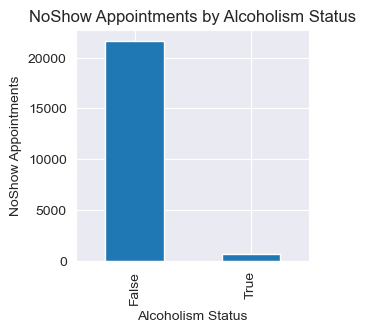

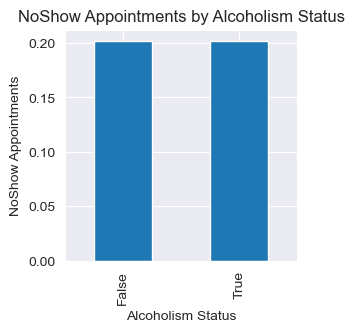

In [48]:
#Plotting the values of Alcoholism status 
df_noshow.groupby('Alcoholism').count()['AppointmentID'].plot(kind = 'bar', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Alcoholism Status')
plt.title('NoShow Appointments by Alcoholism Status')
plt.show()

#Plotting the proportions of Alcoholism status
NoShow_Schol_Prop= df_noshow.groupby(['Alcoholism']).count()['AppointmentID']/df.groupby(['Alcoholism']).count()['AppointmentID']
NoShow_Schol_Prop.plot(kind = 'bar', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Alcoholism Status')
plt.title('NoShow Appointments by Alcoholism Status')
plt.show();

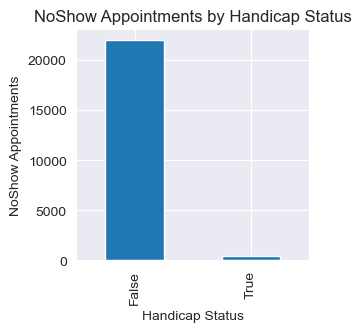

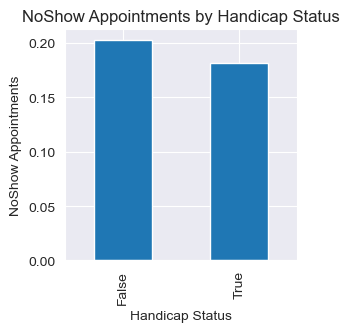

In [49]:
#Plotting the values of Handicap status 
df_noshow.groupby('Handicap').count()['AppointmentID'].plot(kind = 'bar', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Handicap Status')
plt.title('NoShow Appointments by Handicap Status')
plt.show()

#Plotting the proportions of Handicap status
NoShow_Schol_Prop= df_noshow.groupby(['Handicap']).count()['AppointmentID']/df.groupby(['Handicap']).count()['AppointmentID']
NoShow_Schol_Prop.plot(kind = 'bar', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Handicap Status')
plt.title('NoShow Appointments by Handicap Status')
plt.show();

Just like the `Scholarship` and `Hipertension` data, after plotting the proportions, we can see that there's **little or even no difference (like in the case of `Alcoholism`)** between the proportions and **we can conclude that these factors have negligible effect on whether a patient shows up for their appointment or not.**


### 4. Is the patient show up probability affected by the time of the day the apointment is booked for?

Here I am going to look at the time the appointments were booked and see if the time of day has any effect on whether the patient shows up or not

First, I'll add the `AppointmentTime` column

In [50]:
df['AppointmentTime'] = df['ScheduledDay'].dt.time
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,Weekday,AgeGroup,AppointmentTime
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,0,Show,Friday,Female (55+),18:38:08
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,0,Show,Friday,Male (55+),16:08:27


In [51]:
#Splitting the new data into patients that showed up and patients that didn't
df_noshow = df.query('NoShow == "NoShow"')
df_show = df.query('NoShow == "Show"')
df_noshow.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,Weekday,AgeGroup,AppointmentTime
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,False,0,NoShow,Friday,Female (13 - 29),15:05:12


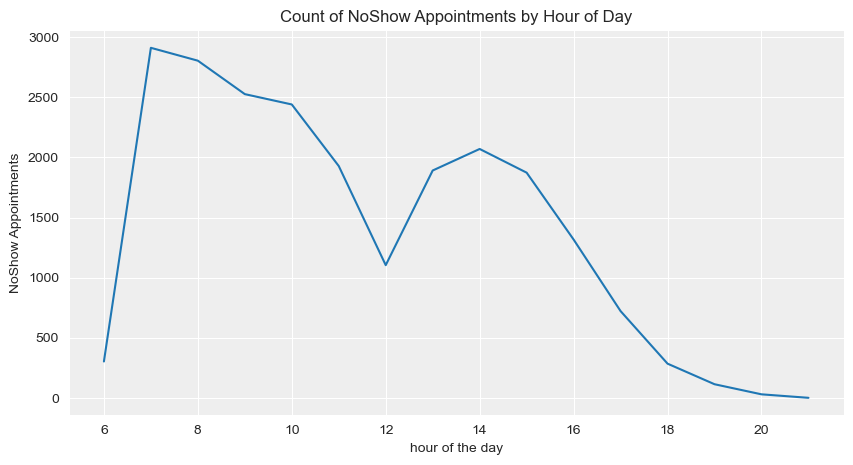

In [52]:
#Plotting values of No show appointments by hour of the day

plt.figure(figsize=(10, 5))
ax = (df_noshow['AppointmentTime'].groupby(df['ScheduledDay'].dt.hour)
                         .count()).plot(kind='line')
ax.set_facecolor('#eeeeee')
ax.set_xlabel("hour of the day")
ax.set_ylabel("NoShow Appointments")
ax.set_title("Count of NoShow Appointments by Hour of Day")
plt.show()

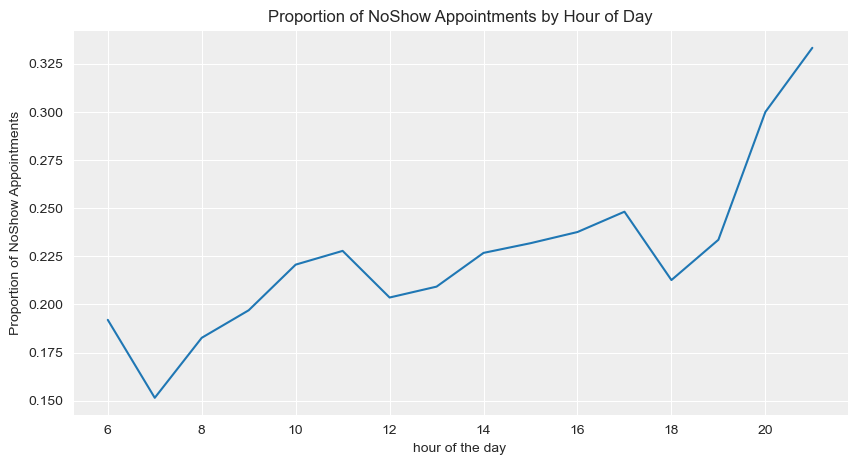

In [53]:
#Plotting values of No show proportions by hour of the day

plt.figure(figsize=(10, 5))
ax = (df_noshow['AppointmentTime'].groupby(df['ScheduledDay'].dt.hour)
                         .count()/df['AppointmentTime'].groupby(df['ScheduledDay'].dt.hour)
                         .count()).plot(kind='line')
ax.set_facecolor('#eeeeee')
ax.set_xlabel("hour of the day")
ax.set_ylabel("Proportion of NoShow Appointments")
ax.set_title("Proportion of NoShow Appointments by Hour of Day")
plt.show()

Just like the `Scholarship` and `Hipertension` data, after plotting the proportions, we can see that there's **little or even no difference (like in the case of `Alcoholism`)** between the proportions and we can conclude that these factors have negligible effect on whether a patoent shows up for their appointment or not.

When we plot the count of NoShow Appointments by Hour of the day, we see that there is a high volume of NoShow appointments around the morning time between `7am and 11am` then also `1pm and 3pm` but as usual, plotting the proportion gives us better insight and we see that a higher proportion of patients that book appointments between `7pm and 9pm` don't show up

We can conclude that **appointments booked at late hours have a higher possibility of becoming a No-Show appointment**

**We can also see a positive correlation between the time appointment is booked and the probability of NoShow.**

### 5. Does the number of reminders sent to patient affect if they'll show up for their appointments or not?


To start, let's get a summary of the `SmsReceived` column

In [54]:
df_noshow['SmsReceived'].describe()

count    22319.000000
mean         0.438371
std          0.496198
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: SmsReceived, dtype: float64

In [55]:
df_show['SmsReceived'].describe()

count    88208.000000
mean         0.291334
std          0.454380
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: SmsReceived, dtype: float64

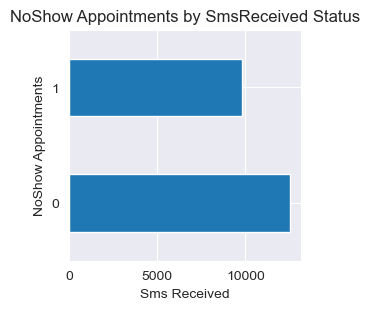

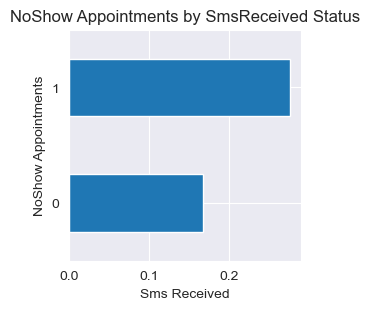

In [56]:
#Plotting the values of SmsReceived status 
df_noshow.groupby('SmsReceived').count()['AppointmentID'].plot(kind = 'barh', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Sms Received')
plt.title('NoShow Appointments by SmsReceived Status')
plt.show()

#Plotting the proportions of SmsReceived status
NoShow_Schol_Prop= df_noshow.groupby(['SmsReceived']).count()['AppointmentID']/df.groupby(['SmsReceived']).count()['AppointmentID']
NoShow_Schol_Prop.plot(kind = 'barh', figsize=(3,3))
plt.ylabel('NoShow Appointments')
plt.xlabel('Sms Received')
plt.title('NoShow Appointments by SmsReceived Status')
plt.show();

After plotting only the values, it seemed that patients that did not receive SMS were the majority of those that did not keep to appointments but after plotting the proportions, we can see that the high values was just because we have more patients that did not receive SMS and there's **little difference** between the proportion of `patients that recieved SMS` and `patients that did not recieve SMS` that don't show up for their appointments. **Infact, a higher proportion of patients that recieved SMS did not show up for appointments.**

**we can therefore conclude that `SMS Revieved` have negligible effect on whether a patient shows up for their appointment or not.**

<a id='conclusions'></a>
### CONCLUSION

From the above analysis, we have been able to answer the 5 questions that we posed earlier and draw the following findings.
- The probability of a ptient showing up for their appointment is not affected by the day of the week in which the appointment was booked
- We could not derive much information on the effect of Neigborhood on patients showing up but we e know that all appointments booked in the `ITARARE` neighborhood were NoShows
- we  concluded that `Scholarship`, `Hipertension`, `Handicap` and `Diabetes` statuses of the patient all have very little effect on whether a patient shows up for their appointment while `Alcoholism` status of the patient have **No Effect**.
- We saw a positive correlation between the time appointment is booked and the probability of NoShow but this does not necessaily mean that it is directly affected by time of day. We however, also noticed that appointments booked at late hours have a higher possibility of becoming a No-Show appointment
- After plotting only the values, it seemed that patients that did not receive SMS were the majority of those that did not keep to appointments but after plotting the proportions, we can see that the high values was just because we have more patients that did not receive SMS and there's little difference between the proportion of patients that recieved SMS and patients that did not recieve SMS that don't show up for their appointments. Infact, a higher proportion of patients that recieved SMS did not show up for appointments.
- We deduced that SMS Revieved have no effect on whether a patient shows up for their appointment or not.

